In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [ ]:
(X_train, Y_train), (X_valid, Y_valid) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
Y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

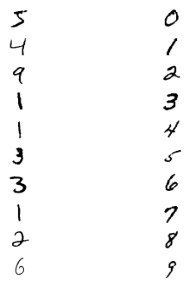

In [ ]:
plt.figure(figsize=(5,5))
for k in range(20):   #Ch
  plt.subplot(10,2,k+1)
  plt.imshow(X_train[k], cmap='Greys')
  plt.axis('off')
  
plt.show()

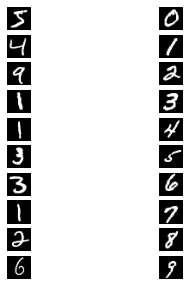

In [ ]:
plt.figure(figsize=(5,5))
for k in range(20):   #Ch
  plt.subplot(10,2,k+1)
  plt.imshow(X_train[k], cmap='Greys_r')
  plt.axis('off')
  
plt.show()

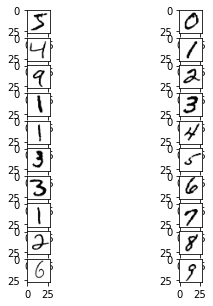

In [ ]:
plt.figure(figsize=(5,5))
for k in range(20):   #Choose a range of training values
  plt.subplot(10,2,k+1)    # This should match with value above (10x2=20)
  plt.imshow(X_train[k], cmap='Greys')
  plt.axis('on')
  
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
Y_valid.shape

(10000,)

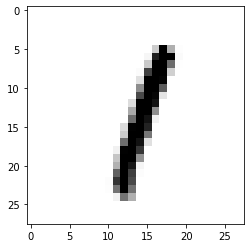

In [ ]:
plt.imshow(X_valid[5], cmap='Greys')

In [ ]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
Y_valid[5]

1

In [ ]:
X_train = X_train.reshape(60000,784).astype('float32')
X_valid = X_valid.reshape(10000,784).astype('float32')

In [ ]:
X_train /= 255
X_valid /= 255

In [ ]:
X_valid[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# We convert the labels to one hot representation.
from keras import utils as np_utils

n_classes = 10
Y_train = keras.utils.np_utils.to_categorical (Y_train, n_classes)
Y_valid = keras.utils.np_utils.to_categorical (Y_valid, n_classes)

In [ ]:
Y_valid[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

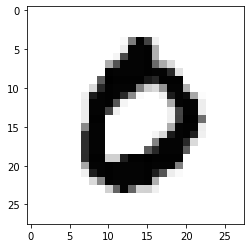

In [ ]:
plt.imshow(X_valid[3], cmap='Greys')

In [ ]:
X_valid[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        150, 253, 202,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
        251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
Y_valid[3]

0

In [ ]:
from keras import utils as np_utils

n_classes = 10
Y_train = keras.utils.np_utils.to_categorical (Y_train, n_classes)
Y_valid = keras.utils.np_utils.to_categorical (Y_valid, n_classes)

In [ ]:
Y_valid[3]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train = X_train.reshape(60000,784).astype('float32')
X_valid = X_valid.reshape(10000,784).astype('float32')

In [ ]:
X_train /= 255
X_valid /= 255

In [ ]:
X_valid[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_train = X_train.reshape(60000,784).astype('float32')
X_valid = X_valid.reshape(10000,784).astype('float32')

In [ ]:
X_train /= 255
X_valid /= 255

Building a neural network using Keras

In [ ]:
model = Sequential() 


In [ ]:
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train,batch_size=128,epochs=85,verbose=1)

Epoch 1/85
469/469 [==============================] - 2s 3ms/step - loss: 0.0542 - accuracy: 0.7179
Epoch 2/85
469/469 [==============================] - 2s 3ms/step - loss: 0.0538 - accuracy: 0.7212
Epoch 3/85
469/469 [==============================] - 2s 3ms/step - loss: 0.0534 - accuracy: 0.7246
Epoch 4/85
469/469 [==============================] - 2s 3ms/step - loss: 0.0529 - accuracy: 0.7274
Epoch 5/85
469/469 [==============================] - 2s 3ms/step - loss: 0.0525 - accuracy: 0.7298
Epoch 6/85
469/469 [==============================] - 2s 3ms/step - loss: 0.0521 - accuracy: 0.7326
Epoch 7/85
469/469 [==============================] - 2s 3ms/step - loss: 0.0517 - accuracy: 0.7357
Epoch 8/85
469/469 [==============================] - 2s 3ms/step - loss: 0.0513 - accuracy: 0.7383
Epoch 9/85
469/469 [==============================] - 2s 3ms/step - loss: 0.0509 - accuracy: 0.7410
Epoch 10/85
469/469 [==============================] - 2s 3ms/step - loss: 0.0505 - accuracy: 0.7435

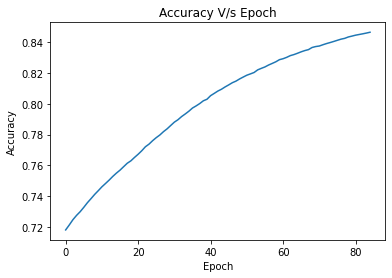

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy V/s Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

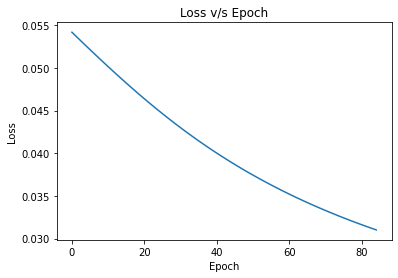

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss v/s Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()